# Exploration 7. 딥러닝 손글씨 인식기

## 7.1. Library Import & Data 확인

In [1]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print("x_train 배열의 크기:", len(x_train))  # x_train 배열의 크기 출력

2.12.0
11490434/11490434 [==============================] - 0s 0us/step
x_train 배열의 크기: 60000


In [41]:
data = mnist.load_data()

type(data)

print(len(data[0]))
print(len(data[0][0]))
print(len(data[0][1]))


print(len(data[1]))
print(len(data[1][0]))
print(len(data[1][1]))


2
60000
60000
2
10000
10000


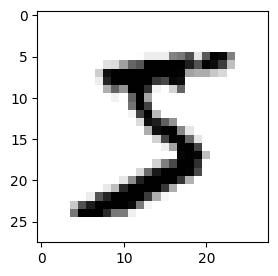

5


In [47]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
print(y_train[0])

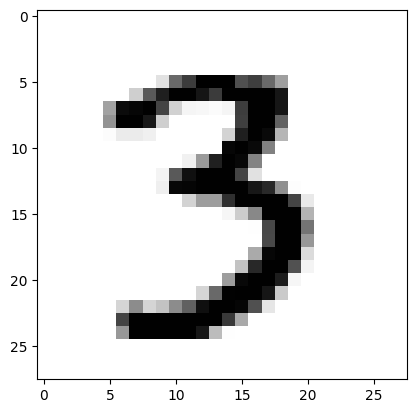

10001 번째 이미지의 숫자는 바로  3 입니다.


In [48]:
# index에 0에서 59999 사이의 숫자를 바꿔가면서 실험해 보세요. 
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 7.2. 손글씨 데이터 전처리

In [53]:
# 픽셀 값 확인. 최대 255까지의 값이 있다

print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [54]:
# 255로 나누어 0~1 사이로 값을 만든다  

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 7.3. Sequential Model 만들어 Train data에 적용하기

In [55]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

"""Conv2D에 적용하는 첫 인수는 몇 개의 특징으로 뽑아낼지 정하는 수"""

Model에 추가된 Layer 개수:  7


In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [57]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [58]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1817 - accuracy: 0.9439
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0621 - accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0455 - accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0355 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0289 - accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0238 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0192 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0169 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0134 - accuracy: 0.9958
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.012

## 7.4. Test data에 적용하기
앞서 train data에 적용했던 모델을 test data에 적용한다  
test data의 이미지가 각 숫자에 가까운 확률을 계산해 가장 높은 숫자를 선택하는 것.  


In [59]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0324 - accuracy: 0.9897 - 551ms/epoch - 2ms/step
test_loss: 0.032368745654821396 
test_accuracy: 0.9897000193595886


In [60]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 [==============================] - 1s 1ms/step
model.predict() 결과 :  [4.1313111e-10 2.9981756e-10 2.9822110e-07 3.0146505e-06 2.6640956e-10
 8.1780201e-11 2.9895819e-17 9.9999607e-01 2.8480263e-09 6.3832050e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


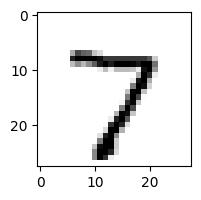

In [64]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

In [67]:
print(len(y_test))
len(wrong_predict_list)

10000


103

예측확률분포: [7.5382937e-05 1.5658438e-08 2.9212436e-01 2.5917718e-02 2.9518769e-11
 6.0696385e-07 1.0843895e-06 4.8164719e-07 6.8187821e-01 2.1730532e-06]
라벨: 3, 예측결과: 8


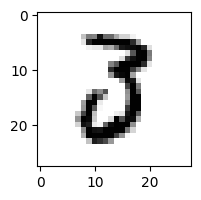

예측확률분포: [2.6647461e-07 1.0588382e-07 5.9023947e-08 4.9759188e-07 4.7936857e-01
 3.4061097e-06 1.3624465e-05 8.5741121e-08 2.6998241e-05 5.2058643e-01]
라벨: 4, 예측결과: 9


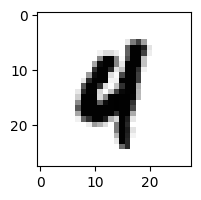

예측확률분포: [3.83178413e-01 1.27195756e-08 5.48788786e-01 6.79727122e-02
 5.73051935e-08 3.16791738e-05 1.09108805e-05 7.09712083e-07
 1.13465494e-05 5.31274327e-06]
라벨: 0, 예측결과: 2


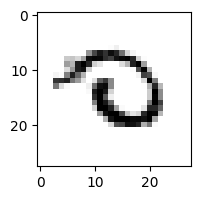

예측확률분포: [8.9105968e-05 1.7881812e-15 2.3168931e-10 5.2238920e-07 1.3466947e-10
 1.5088526e-04 9.9975902e-01 3.8565762e-16 4.4064859e-07 3.8290218e-10]
라벨: 5, 예측결과: 6


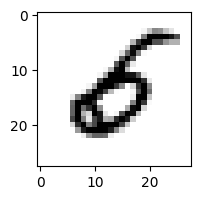

예측확률분포: [6.7329038e-11 7.3621358e-08 2.2850898e-08 7.7946909e-04 5.9314380e-06
 5.4120797e-01 1.3462596e-11 4.0583775e-10 1.3626917e-03 4.5664379e-01]
라벨: 9, 예측결과: 5


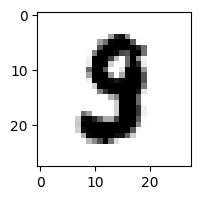

In [63]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()